# [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385)

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    Activation,
    Conv2D,
    MaxPool2D,
    add)

from tensorflow.keras.utils import plot_model

In [2]:
def residual_block(layer_in, n_filters):
    merge_input = layer_in
    
    if layer_in.shape[-1] != n_filters:
        merge_input = Conv2D(n_filters, (1,1), padding='same',
                            activation='relu',
                             kernel_initializer='he_normal')(layer_in)
    
    conv1 = Conv2D(n_filters, (3,3), padding='same', activation='relu',
                  kernel_initializer='he_normal')(layer_in)
    conv2 = Conv2D(n_filters, (3,3), padding='same', activation='linear',
                  kernel_initializer='he_normal')(conv1)
    
    layer_out = add([conv2, merge_input])
    layer_out = Activation('relu')(layer_out)
    return layer_out


In [3]:
visible = Input(shape=(256, 256, 3))
layer = residual_block(visible, 64)

model = Model(inputs=visible, outputs=layer)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 64) 36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 256         input_1[0][0]                    
______________________________________________________________________________________________

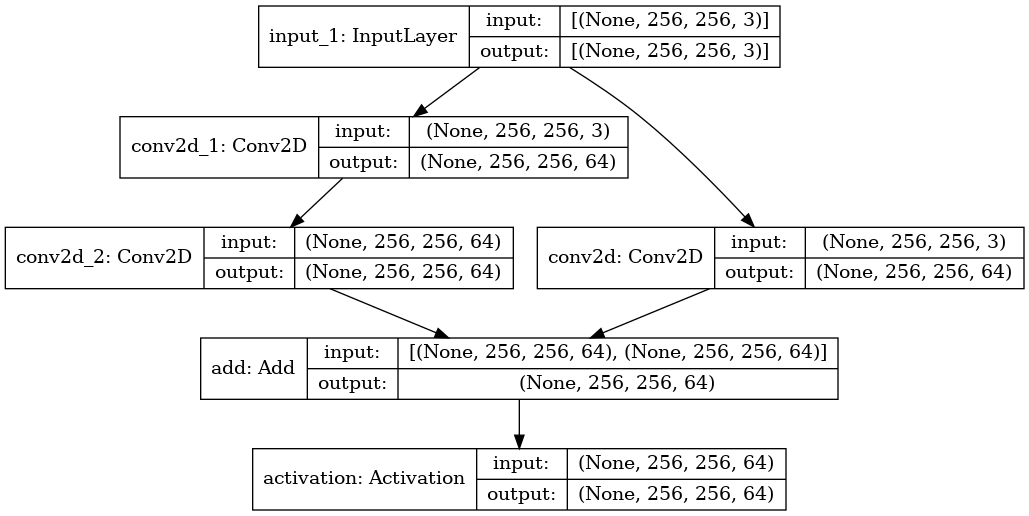

In [4]:
plot_model(model, show_shapes=True, to_file='residual_model.png')